# Analyse des années de naissance des intellectuels

Question : comment les naissances des intellectuels sont-elles ditribuées dans le temps ?

## Importation des librairies

In [1]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pprint
import csv
import ast
import re

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

In [3]:
import sparql_functions as spqf

In [4]:
reload(spqf)

<module 'sparql_functions' from 'C:\\jupyter_notebooks\\JS_intellectuels\\sparql_functions.py'>

# Distribution dans le temps de la naissance des intellectuels de DBPedia (0-1000)

In [5]:
db = 'data/intellectuels.db'

In [6]:
### Inspecter le résultat d'une requête après insertion, une fois l'insert ci-dessus effectué

query = """
SELECT GROUP_CONCAT(value), uri_entity, count(*) as eff
FROM property p
WHERE p.property LIKE '%birthD%' OR p.property LIKE '%birthY%'
GROUP BY uri_entity
ORDER BY eff DESC ;

"""

# connnexion à la base de données
cn = sql.connect(db)
c = cn.cursor()

### exécuter la requëte sur la base de donées SQLite pour récupérer les valeurs que contient la ligne
c.execute(query)
result_q = []
result_q = c.fetchall()

# fermer la connexion
cn.close()
print(len(result_q))
result_q[:5]

103867


[('1960-09-19,1962-11-27,1964-05-28,1965-12-15,1966-07-25,1969-12-12,1970-02-04,1971-02-25,1972-05-21,1972-11-01,1974-01-07,1974-01-11,1960,1972,1960-09-19,1962-11-27,1964-05-28,1965-12-15,1966-07-25,1969-12-12,1970-02-04,1971-02-25,1972-05-21,1972-11-01,1974-01-07,1974-01-11',
  'http://dbpedia.org/resource/List_of_Playboy_Playmates_of_1993',
  26),
 ('1928,1928-10-08,1940-09-08,1940-11-06,1940-12-03,1945-01-24,1951-02-06,1951-08-09,1952-06-15,1952-11-13,1953-12-23,1955-08-06,1958-10-02',
  'http://dbpedia.org/resource/Quorum_of_the_Twelve_Apostles_(LDS_Church)',
  13),
 ('1941-02-16,1941,1941-02-16,1942-02-16,Camp Voroshilov, Primorsky Krai, Far Eastern Federal District, Russian SFSR, Soviet Union,http://dbpedia.org/resource/Khabarovsk_Krai,http://dbpedia.org/resource/Khabarovsky_District,http://dbpedia.org/resource/Korea_under_Japanese_rule,http://dbpedia.org/resource/Paektu_Mountain,http://dbpedia.org/resource/Russian_Soviet_Federative_Socialist_Republic,http://dbpedia.org/resource

In [7]:
ldn = [l[0] for l in result_q]
print(len(ldn))
ldn.sort()
ldn[:5]

103867


['', '', '', '', '']

In [8]:
# Extraire les années
listeDateNaiss = []
annee = re.compile(r'\d{4}')

for l in result_q:
    listeDateNaiss.append(annee.findall(l[0])) 
    
# Vérifier que la longueur de la liste corresponde aux données de la base de données
len(listeDateNaiss)

103867

In [9]:
print(len(listeDateNaiss))

# Choix de codage : retenir la date la plus basse s'il existe plusieurs dates de naissance pour un seul individu
anneeNaiss = [min(l) for l in listeDateNaiss if l]
print(len(anneeNaiss))

#Trier les années avec la fonction .sort
anneeNaiss.sort()
anneeNaiss[:5]

103867
103289


['0001', '0001', '0001', '0001', '0001']

In [16]:
# codage: retenir seulement les dates inférieures à 1000
listeAnnees = [int(a) for a in anneeNaiss if a > '1880']

In [17]:
### liste des années issues de la table 'property'
listeAnnees.sort()
print(len(listeAnnees))
print(min(listeAnnees), max(listeAnnees))
listeAnnees[:5]

84914
1881 2020


[1881, 1881, 1881, 1881, 1881]

## Analyse des années de naissances

In [18]:
#créer une serie avec la liste des années pour pouvoir l'analyser
seriesAnnees = pd.Series(listeAnnees)  # listeAnnees  listeAnneesSPARQL  int_lasp
seriesAnnees

0        1881
1        1881
2        1881
3        1881
4        1881
         ... 
84909    2018
84910    2018
84911    2019
84912    2019
84913    2020
Length: 84914, dtype: int64

In [19]:
### ATTENTION moyenne et écart type n'ont pas de sens dans ce contexte

seriesAnnees.describe()

count    84914.000000
mean      1943.346986
std         26.047140
min       1881.000000
25%       1926.000000
50%       1947.000000
75%       1963.000000
max       2020.000000
dtype: float64

In [20]:
# Création d'un DataFrame avec les années
df_annees = pd.DataFrame(seriesAnnees, columns = ['annee'])
df_annees

,annee
0,1881
1,1881
2,1881
3,1881
4,1881
...,...
84909,2018
84910,2018
84911,2019
84912,2019


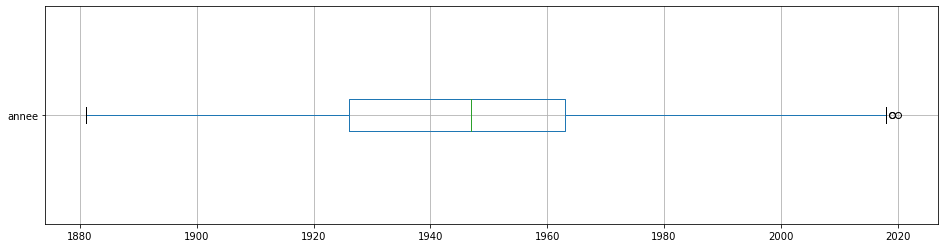

In [21]:
boxplot = df_annees.boxplot(column=['annee'], vert=False, figsize=(16,4))

## Distribution des naissances par année et par période de 20 ans

#### Regroupement des vraies valeurs par année

In [22]:
# Compter les naissances par année
counterListeAnnees = Counter(listeAnnees)
groupedListeAnnees = list(zip(counterListeAnnees.keys(), counterListeAnnees.values()))

In [23]:
groupedListeAnnees[75:90]

[(1956, 1359),
 (1957, 1249),
 (1958, 1264),
 (1959, 1236),
 (1960, 1255),
 (1961, 1134),
 (1962, 1123),
 (1963, 1133),
 (1964, 1161),
 (1965, 1047),
 (1966, 1005),
 (1967, 983),
 (1968, 997),
 (1969, 1046),
 (1970, 1041)]

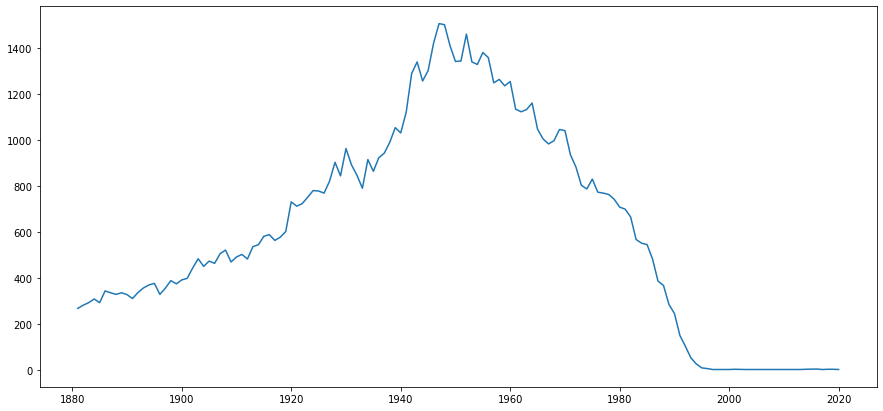

In [24]:
objects = [l[0] for l in groupedListeAnnees]
eff = [l[1] for l in groupedListeAnnees]

plt.figure(figsize=(15,7))
plt.plot(objects, eff)

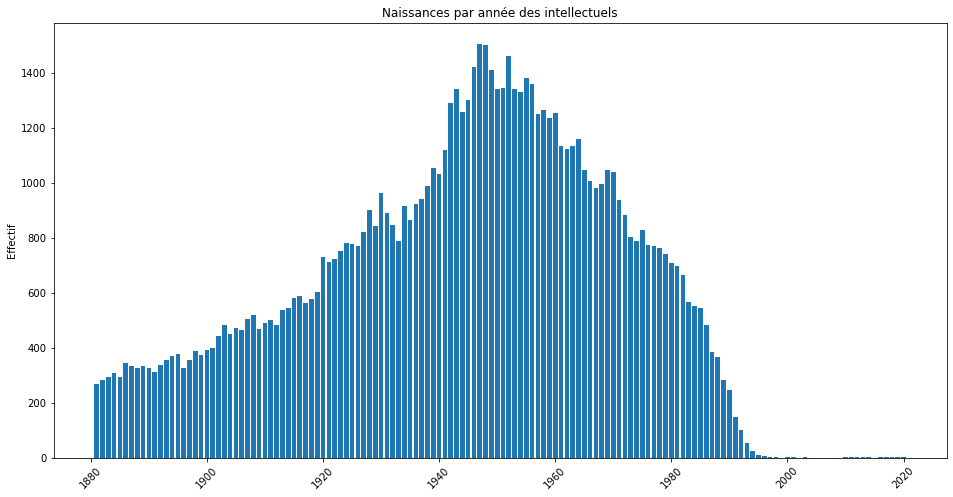

In [47]:
# Distribution par année

objects = [l[0] for l in groupedListeAnnees]
eff = [l[1] for l in groupedListeAnnees]

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title('Naissances par année des intellectuels')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

#### Regroupement des valeurs par 20 ans

In [32]:
# Compter les naissances par année
counterListeAnnees = Counter(listeAnnees)
groupedListeAnnees = list(zip(counterListeAnnees.keys(), counterListeAnnees.values()))

In [41]:
### Créer la liste des périodes de 20 ans depuis 1781, i.e. la liste de la première année de chaque période
d20List = []
period = 20
d_start = 1880
i = 0
d20List.append(d_start)

while i < 6:
    d_start = d_start + period
    d20List.append(d_start)
    i += 1

In [42]:
# Première et dernière périodes de 20 ans
print(d20List[:2])
min(d20List), max(d20List)

[1880, 1900]


(1880, 2000)

In [43]:
# Regroupement par période de 20 ans grâce à une boucle qui fait la liste des écarts de 20 ans, puis une autre boucle compte le nombre d'occurrence pour chaque écart de 20 ans.
i20List = []
for i in d20List:
    i_n = 0
    for l in groupedListeAnnees:
        if l[0] >= i and l[0] < (i + 20):
            i_n = i_n + l[1]
    i20List.append([i, i_n])

In [44]:
i20List[5]

[1980, 5842]

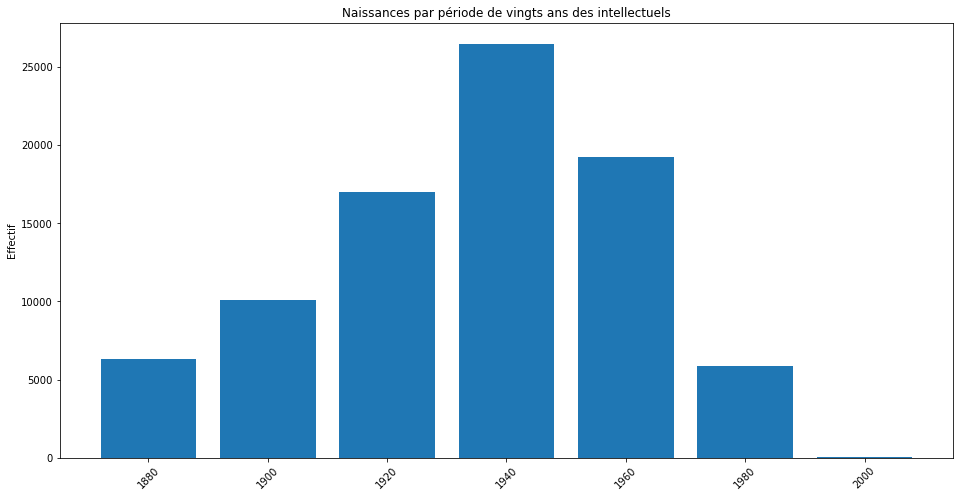

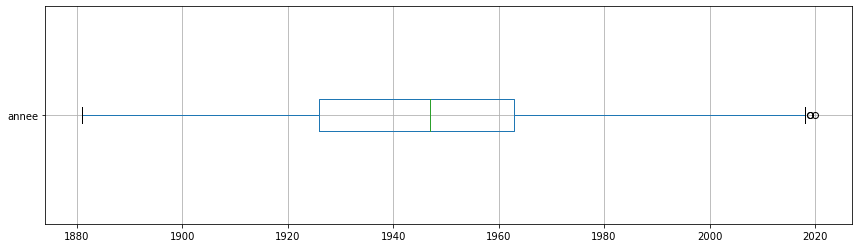

In [46]:
# Distribution par période de 20 ans

objects = [str(l[0]) for l in i20List]
eff = [l[1] for l in i20List]

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title('Naissances par période de vingts ans des intellectuels')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

pt = df_annees.boxplot(column=['annee'], vert=False, figsize=(16,4))
### https://www.pythonprogramming.in/boxplot-adjust-bottom-and-left.html
#ax = fig.add_subplot()
plt.subplots_adjust(left=0.20) 
plt.show()